In [1]:
#!git clone https://github.com/Dampata/ENLiT_challenge.git
#%cd ENLiT_challenge/Data

Cloning into 'ENLiT_challenge'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 57 (delta 9), reused 20 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 2.99 MiB | 5.46 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/Users/damienpantalos/Documents/ENLiT_challenge/Data/ENLiT_challenge/Data


In [17]:
import pandas as pd
import datetime as dt

# Step 1: Load your data 
df_scheinder_energy = pd.read_csv('Data/Consumption_production.csv',skiprows=1)  # Load all data 

# LCOE of each technology
LCOE_solar= 121.80 #€/MWh
LCOE_wind= 96.70 #€/MWh
LCOE_nuclear= 116.50  #€/MWh
LCOE_hydro= 99.30  #€/MWh
LCOE_coal= 78.60  #€/MWh
LCOE_gas= 46.80  #€/MWh
LCOE_geothermal= 91.60  #€/MWh
LCOE_biomass= 146.30  #€/MWh



# Step 3: Add a default Year column (since you need a year for datetime conversion)
df_scheinder_energy['Year'] = 2023  # You can set this to whatever year you are working with
df_scheinder_energy = df_scheinder_energy.drop(index=0)  # Removes row with index 0

df_scheinder_energy
df_scheinder_energy = df_scheinder_energy.astype(float)
# Step 4: Ensure Month, Day, and Hour are integers (this step ensures proper formatting)
df_scheinder_energy['Month'] = df_scheinder_energy['Month'].astype(int)
df_scheinder_energy['Day'] = df_scheinder_energy['Day'].astype(int)
df_scheinder_energy['Hour'] = df_scheinder_energy['Hour'].astype(int)

# Step 5: Convert Hour = 24 to Hour = 00
df_scheinder_energy['Hour'] = df_scheinder_energy['Hour'].replace(24, 0)

# Step 6: Combine Year, Month, Day, and Hour into a 'timestamp' column
df_scheinder_energy['timestamp'] = pd.to_datetime(df_scheinder_energy[['Year', 'Month', 'Day', 'Hour']])
df_scheinder_energy = df_scheinder_energy[['timestamp', 'Year'] + [col for col in df_scheinder_energy.columns if col != 'timestamp' and col != 'Year']]

# Step 7: Delete the first 3 columns (Month, Day, Hour)
df_scheinder_energy = df_scheinder_energy.drop(df_scheinder_energy.columns[2:5], axis=1)

df_scheinder_energy = df_scheinder_energy.iloc[:, :7]
# Display the final DataFrame
df_scheinder_energy.head()





,timestamp,Year,SITE CONSUMPTION Grid supply (kWh),SITE CONSUMPTION Natural Gas (kWh),ONSITE SOLAR SYSTEM PRODUCTION (kWh),GRID (EEX) Price (€/MWh),NG (TTF) Price (€/MWh)
1,2023-01-01 01:00:00,2023.0,224.0,44.8,0.0,-1.2,0.6
2,2023-01-01 02:00:00,2023.0,280.0,56.0,0.0,-1.0,0.5
3,2023-01-01 03:00:00,2023.0,323.8,64.8,0.0,-3.7,1.8
4,2023-01-01 04:00:00,2023.0,262.5,52.5,0.0,-3.1,1.5
5,2023-01-01 05:00:00,2023.0,287.0,57.4,0.0,-3.8,1.9


In [21]:
df_scheinder_energy['demand']  = df_scheinder_energy['SITE CONSUMPTION Grid supply (kWh)'].astype(float)+df_scheinder_energy['SITE CONSUMPTION Natural Gas (kWh)'].astype(float)

df_scheinder_energy['Energy_not_covered']= df_scheinder_energy['demand'].astype(float)-df_scheinder_energy['ONSITE SOLAR SYSTEM PRODUCTION (kWh)'].astype(float)

# add wind energy of 1kW capacity
df_scheinder_energy['ONSITE WIND TURBINE PRODUCTION (kWh)'] = pd.read_csv('Data/wind_RN.csv',usecols=[2])

total_cost_grid=sum(df_scheinder_energy['GRID (EEX) Price (€/MWh)']*df_scheinder_energy['SITE CONSUMPTION Grid supply (kWh)']/1000)
total_cost_NG=sum(df_scheinder_energy['NG (TTF) Price (€/MWh)']*df_scheinder_energy['SITE CONSUMPTION Natural Gas (kWh)']/1000)

print('Total cost of grid supply:',total_cost_grid, '€')
print('Total cost of NG supply:',total_cost_NG, '€')


df_scheinder_energy.head(10)

Total cost of grid supply: 574338.5514399984 €
Total cost of NG supply: 57673.23284999986 €


,timestamp,Year,SITE CONSUMPTION Grid supply (kWh),SITE CONSUMPTION Natural Gas (kWh),ONSITE SOLAR SYSTEM PRODUCTION (kWh),GRID (EEX) Price (€/MWh),NG (TTF) Price (€/MWh),demand,Energy_not_covered,ONSITE WIND TURBINE PRODUCTION (kWh)
1,2023-01-01 01:00:00,2023.0,224.0,44.8,0.0,-1.2,0.6,268.8,268.8,0.305
2,2023-01-01 02:00:00,2023.0,280.0,56.0,0.0,-1.0,0.5,336.0,336.0,0.317
3,2023-01-01 03:00:00,2023.0,323.8,64.8,0.0,-3.7,1.8,388.6,388.6,0.316
4,2023-01-01 04:00:00,2023.0,262.5,52.5,0.0,-3.1,1.5,315.0,315.0,0.294
5,2023-01-01 05:00:00,2023.0,287.0,57.4,0.0,-3.8,1.9,344.4,344.4,0.317
6,2023-01-01 06:00:00,2023.0,234.5,46.9,0.0,-3.3,1.6,281.4,281.4,0.341
7,2023-01-01 07:00:00,2023.0,353.5,70.7,0.0,-0.9,0.5,424.2,424.2,0.360
8,2023-01-01 08:00:00,2023.0,236.3,47.3,0.0,-1.1,0.5,283.6,283.6,0.376
9,2023-01-01 09:00:00,2023.0,299.3,59.9,0.0,-0.7,0.4,359.2,359.2,0.383
10,2023-01-01 10:00:00,2023.0,302.8,60.6,10.6,-0.2,0.1,363.4,352.8,0.404


LCOE COST OF ENERGY

In [28]:
cost_NG=sum(df_scheinder_energy['SITE CONSUMPTION Natural Gas (kWh)']/1000)*LCOE_gas
print('Cost of NG supply:',Cost_NG, '€')

cost_PV=sum(df_scheinder_energy['ONSITE SOLAR SYSTEM PRODUCTION (kWh)']/1000)*LCOE_solar
print('Cost of PV supply:',cost_PV, '€')

cost_wind=df_scheinder_energy['ONSITE WIND TURBINE PRODUCTION (kWh)'].sum()/1000*LCOE_wind
print('Cost of wind supply:',cost_wind, '€')


Cost of NG supply: 78853.09536000005 €
Cost of PV supply: 157551.58860000045 €
Cost of wind supply: 264.3291599 €


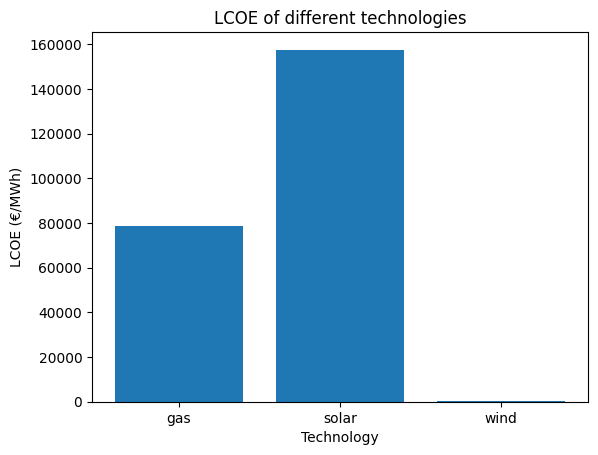

In [30]:
# plot the different LCOE

import matplotlib.pyplot as plt

LCOE=[cost_NG,cost_PV,cost_wind]
technology=['gas','solar','wind']

plt.bar(technology,LCOE)
plt.ylabel('LCOE (€/MWh)')
plt.xlabel('Technology')
plt.title('LCOE of different technologies')
plt.show()
